# Preamble

**Title:** *GINI x Education* <BR>
**Author:** *ASHISH ACHARYA* <BR>
**Email:** *ashishacharya0@gmail.com* <BR>
**Last Update:** *1:10 AM OCTOBER 7TH, 2021*



# Introduction
We want to analyze if there is a relationship between a country's Global Inequality Index (GINI) and the Education Index (combining average years of schooling for adults with expected years of schooling for children).

# Dataset
The dataset for this report consists of a collection of 40 attributes from 264 countries. This study focuses on two attributes: gini and edu_index.

# BASE CODE

In [27]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: correlation analysis and linear regression (attempt)
# BASE CODE FOR LINEAR REGRESSION AND DECISION TREE REGRESSION
# NEED TO RUN THIS BEFORE YOU RUN FURTHER CELLS

#from google.colab import drive
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import csv

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab_Datasets/country_indicators/'
DATASET_NAME = 'country_indicators.csv'

# Google drive mount
# drive.mount('/content/drive')

# create a pandas data frame from the CSV file
df = pd.read_csv(os.path.join(DATA_FOLDER, DATASET_NAME))

# (optional) define the country as the index for the data frame
# HAVE TO ASSIGN IT TO A DF BECASUE SET INDEX DOENST MODIFY THE ORIGINAL DF
df = df.set_index('country')
#display(df) #265 rows × 39 columns

# (optional) remove all columns except 'gini' and 'edu_index' from the data frame
df.drop(df.columns.difference(['gini','edu_index']), 1, inplace=True)
#display(df) #265 rows × 2 columns (as expected)

# remove any country (index) that does not have both 'gini' and 'edu_index' values
df = df[df['gini'].notna()] 
#display(df) #158 rows
df = df[df['edu_index'].notna()] 
#display(df) #148 rows

# compute and display the correlation matrix between 'gini' and 'edu_index'
corrMatrix = df.corr()
print ("Correlation Matrix : \n" , corrMatrix)

Correlation Matrix : 
            edu_index    gini
edu_index     1.0000 -0.3715
gini         -0.3715  1.0000


# Linear Regression

LINEAR REGRESSION R^2 SCORE: 0.14


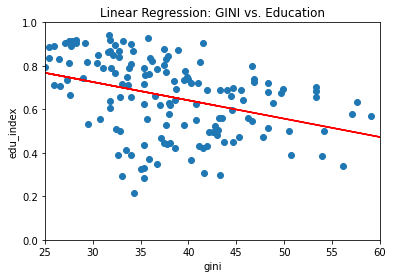

In [32]:

# attempt a linear regression model, displaying the obtained r2 score
X = df['gini'].values.reshape((-1, 1))
Y = df['edu_index'].values.reshape((-1, 1))
model = LinearRegression().fit(X, Y)
score = model.score(X, Y)
print('LINEAR REGRESSION R^2 SCORE: {:.2f}'.format(score))

# visualization of the data points and the fitted line
Y_pred = model.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, '-r')
plt.xlabel('gini')
plt.ylabel('edu_index')
plt.xlim([25, 60])
plt.ylim([0, 1])
plt.title('Linear Regression: GINI vs. Education')
plt.show()

# Decision Tree Regression

DECISION TREE REGRESSION R^2 SCORE: 0.72


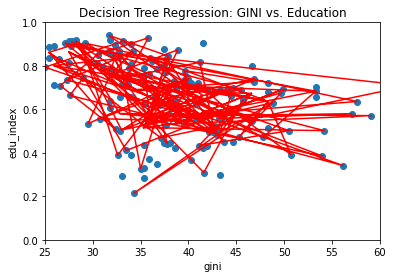

In [33]:
# linear regression model, displaying the obtained r2 score
X = df['gini'].values.reshape((-1, 1))
Y = df['edu_index'].values.reshape((-1, 1))
model = DecisionTreeRegressor().fit(X, Y)
score = model.score(X, Y)
print('DECISION TREE REGRESSION R^2 SCORE: {:.2f}'.format(score))

# visualization of the data points and the fitted points
Y_pred = model.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, '-r')
plt.xlabel('gini')
plt.ylabel('edu_index')
plt.xlim([25, 60])
plt.ylim([0, 1])
plt.title('Decision Tree Regression: GINI vs. Education')
plt.show()
